<h1> Feature Scaling - Standardization (also know as z-score normalization)</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!kaggle datasets download -d d4rklucif3r/social-network-ads -p sample_data

Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/1.46k [00:00<?, ?B/s]
100% 1.46k/1.46k [00:00<00:00, 1.44MB/s]


In [3]:
!unzip sample_data/social-network-ads.zip

Archive:  sample_data/social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(10)

,Age,EstimatedSalary,Purchased
281,35,61000,0
229,42,80000,1
129,26,84000,0
135,23,63000,0
259,45,131000,1
206,55,130000,1
368,38,71000,0
70,25,80000,0
94,29,83000,0
25,47,20000,1


<h2>Train test split</h2>

In [46]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(df.drop('Purchased' , axis=1) , df['Purchased'] , test_size=0.2 , random_state=0)

X_train.shape , X_test.shape

((320, 2), (80, 2))

<h2>StandardScaler</h2>

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

<h2>X_train_scaled is a numpy array so convert it to data frame</h2>

In [49]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [50]:
X_train_scaled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [51]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [52]:
np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

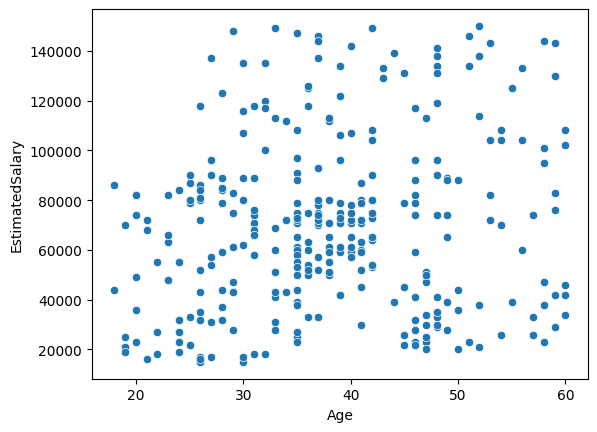

In [53]:
sns.scatterplot(x='Age' , y='EstimatedSalary' , data=X_train)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

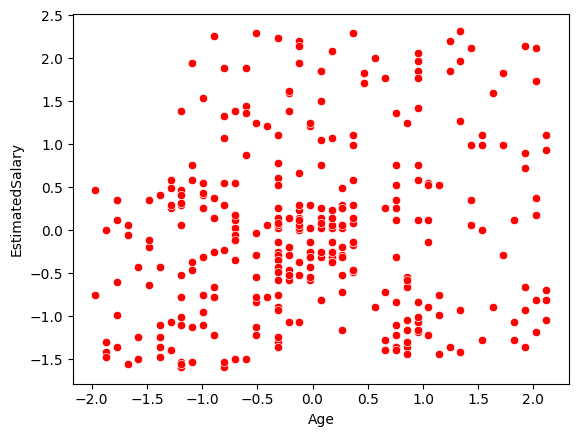

In [54]:
sns.scatterplot(x='Age' , y='EstimatedSalary' , data=X_train_scaled , color='red')

<ipython-input-55-69d05702e307>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'] , hist=False)
<ipython-input-55-69d05702e307>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['EstimatedSalary'] , hist=False)


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

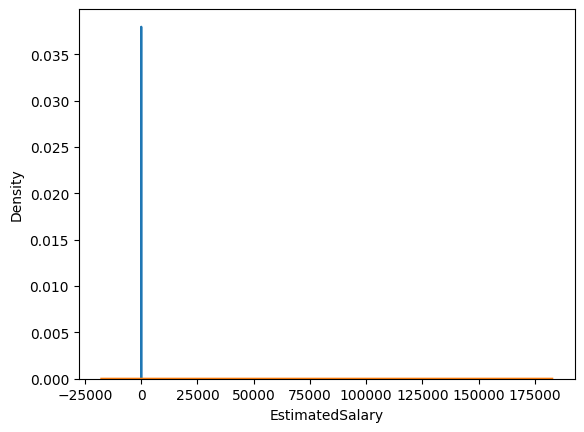

In [55]:
sns.distplot(X_train['Age'] , hist=False)
sns.distplot(X_train['EstimatedSalary'] , hist=False)

<ipython-input-56-c8f52b490135>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['Age'] , hist=False)
<ipython-input-56-c8f52b490135>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['EstimatedSalary'] , hist=False)


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

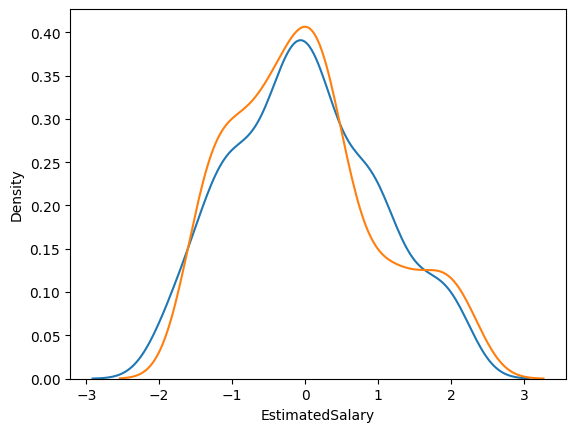

In [56]:
sns.distplot(X_train_scaled['Age'] , hist=False)
sns.distplot(X_train_scaled['EstimatedSalary'] , hist=False)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [58]:
lr.fit(X_train , Y_train)
lr_scaled.fit(X_train_scaled , Y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [60]:
from sklearn.metrics import accuracy_score
print("Actual : ",accuracy_score(Y_test,y_pred))
print("Scaled : ",accuracy_score(Y_test,y_pred_scaled))

Actual :  0.9125
Scaled :  0.925
